In [1]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from matplotlib.ticker import ScalarFormatter

import hazrisk.hazard as haz
import hazrisk.risk as rsk
import hazrisk.fragility as frag
importlib.reload(haz)
importlib.reload(rsk)
importlib.reload(frag)

<module 'hazrisk.fragility' from 'C:\\Users\\clemettn\\Documents\\pypackages\\hazrisk\\hazrisk\\fragility.py'>

In [58]:
# Risk parameters
target_mafcs = [2e-4, 5e-05, 1e-5] # target mean annual freq. of collapse

# hazard parameters first order -> Tailfingen for SA = 0.5s on rock
k0_1 = 6.614486E-05
k1_1 = 1.76677717

# hazard parameters second order
k0_2 = 5.464961E-05
k1_2 = 2.167705731
k2_2 = 0.154938232

max_sa = 15  # maximum spectral acceleration value
step = 0.01

# fragility function parameters
beta = 0.4  # lognormal standard deviation

# define the intensity measure (spectral acceleration) values
im = np.linspace(0, max_sa, int(max_sa/step) + 1)
im[0] = 1e-6  # avoid zero for lognormal fragility curve

## Risk Contribution --> First Order Hazard

In [59]:
# first order hazard curve
H_im_fo = haz.first_order_approx(im, k0_1, k1_1)
dH_dx_fo = haz.first_order_dHdx(im, k0_1, k1_1)

<>:24: SyntaxWarning: invalid escape sequence '\l'
<>:24: SyntaxWarning: invalid escape sequence '\l'
C:\Users\clemettn\AppData\Local\Temp\ipykernel_21552\2373188436.py:24: SyntaxWarning: invalid escape sequence '\l'
  label=f'$\lambda_{{c,t}}$ = {mafc_t:.1e}', align='edge', alpha=0.7)


Target MAFC: 2.000e-04
Required theta_c for target MAFC: 0.616
MAFC (analytical): 2.000e-04
MAFC (numerical): 1.960e-04
1.0000000000000022
Target MAFC: 5.000e-05
Required theta_c for target MAFC: 1.349
MAFC (analytical): 5.000e-05
MAFC (numerical): 4.954e-05
1.0000000000000022
Target MAFC: 1.000e-05
Required theta_c for target MAFC: 3.356
MAFC (analytical): 1.000e-05
MAFC (numerical): 9.963e-06
1.0


(0.0, 0.012)

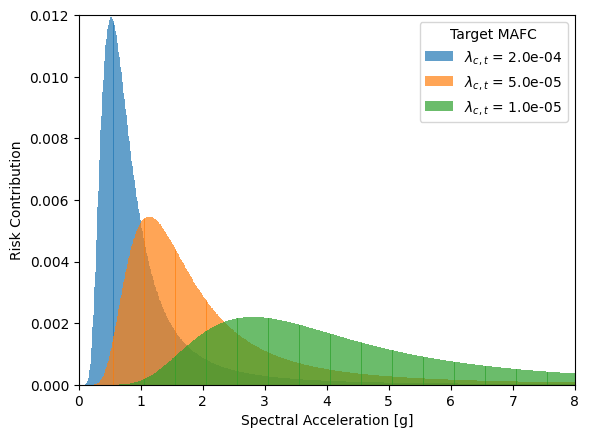

In [61]:
# Plot the risk contributions for each target MAFC
plt.figure()
ax = plt.gca()

for mafc_t in target_mafcs:
    theta_c = rsk.required_capacity_first_order(mafc_t, k0_1, k1_1, beta)
    fragility = frag.lognormal_fragility_curve(im, theta_c, beta)
    
    mafc_a = rsk.mafe_first_order(theta_c, k0_1, k1_1, beta)
    mafc_n = rsk.numerical_mafe(im, H_im_fo, fragility)
    
    risk_contribution_values = rsk.risk_contribution(im, H_im_fo, fragility, 
                                                     normalised=True)

    print(40*"=")
    print(f"Target MAFC: {mafc_t:.3e}")
    print(f"Required theta_c for target MAFC: {theta_c:.3f}")
    print(f"MAFC (analytical): {mafc_a:.3e}")
    print(f"MAFC (numerical): {mafc_n:.3e}")
    print(sum(risk_contribution_values))
    print(40*"=")

    ax.bar(im, risk_contribution_values, width=step*1.01, \
           label=f'$\lambda_{{c,t}}$ = {mafc_t:.1e}', align='edge', alpha=0.7)

ax.legend(title='Target MAFC', loc='upper right')
ax.set_xlabel('Spectral Acceleration [g]')
ax.set_ylabel('Risk Contribution')
ax.set_xlim(0, 8)
ax.set_ylim(0, 0.012)


<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
C:\Users\clemettn\AppData\Local\Temp\ipykernel_21552\1064355093.py:11: SyntaxWarning: invalid escape sequence '\l'
  ln, = ax2.plot(im, fragility, label=f'$\lambda_{{c,t}}$ = {mafc_t:.1e}')


(0.0, 1.0)

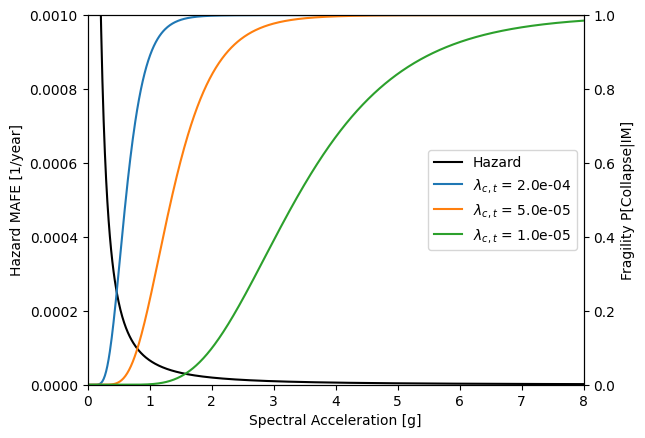

In [62]:
# plot hazard and fragility curves
fig, ax1 = plt.subplots() 
lns = []
ln, = ax1.plot(im, H_im_fo, label='Hazard', color='k')
lns.append(ln)
ax2 = ax1.twinx()

for mafc_t in target_mafcs:
    theta_c = rsk.required_capacity_first_order(mafc_t, k0_1, k1_1, beta)
    fragility = frag.lognormal_fragility_curve(im, theta_c, beta)
    ln, = ax2.plot(im, fragility, label=f'$\lambda_{{c,t}}$ = {mafc_t:.1e}')
    lns.append(ln)

labs = [l.get_label() for l in lns]

ax1.legend(lns, labs, loc="center right")
ax1.set_xlabel('Spectral Acceleration [g]')
ax1.set_ylabel('Hazard MAFE [1/year]')
ax2.set_ylabel('Fragility P[Collapse|IM]')
ax1.set_xlim(0, 8)

ax1.set_ylim(0, 1e-3)
ax2.set_ylim(0, 1)

<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
C:\Users\clemettn\AppData\Local\Temp\ipykernel_21552\2330592378.py:39: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Risk Contribution for $\lambda_{{c,t}}$ = {mafc_t:.1e}")


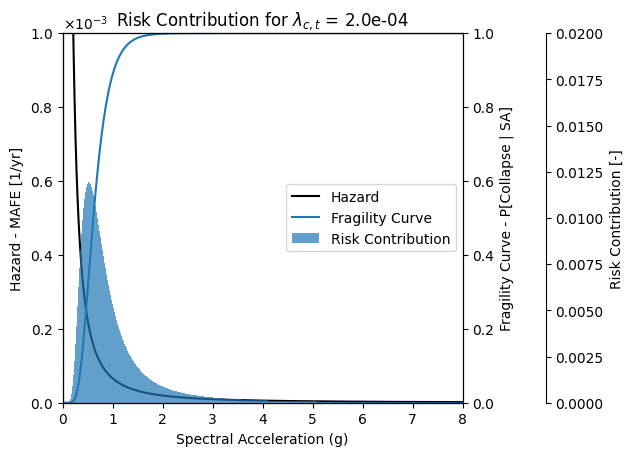

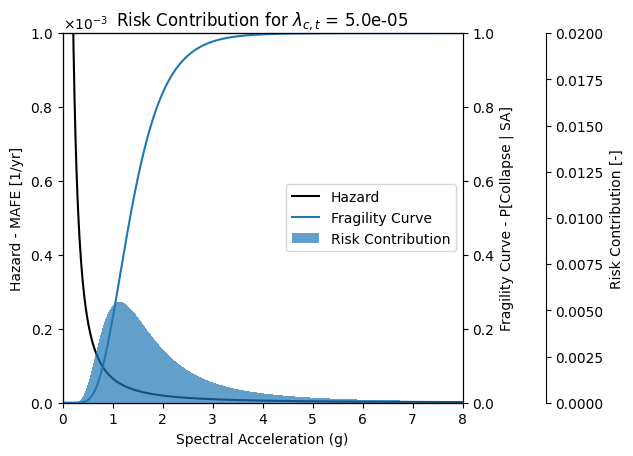

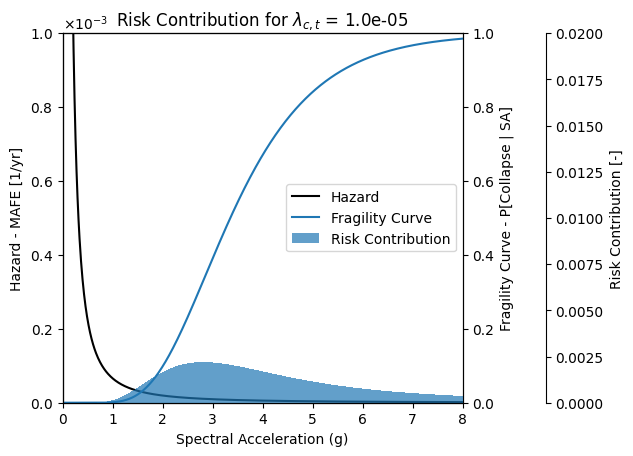

In [63]:
# plot hazard curves and fragility curves together with risk contributions

for mafc_t in target_mafcs:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax3 = ax1.twinx() 
    
    theta_c = rsk.required_capacity_first_order(mafc_t, k0_1, k1_1, beta)
    fragility = frag.lognormal_fragility_curve(im, theta_c, beta)
    mafc_n = rsk.numerical_mafe(im, H_im_fo, fragility)
    risk_contribution_values = rsk.risk_contribution(im, H_im_fo, fragility, 
                                                     normalised=True)

    ln1, = ax1.plot(im, H_im_fo, label='Hazard', color='k')
    ln2, = ax2.plot(im, fragility, label=f'Fragility Curve') 
    ln3 = ax3.bar(im, risk_contribution_values, width=step*1.01, 
                   label=f'Risk Contribution', alpha=0.7, align='edge')
    
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))  # always use scientific notation
    ax1.yaxis.set_major_formatter(formatter)

    lines = [ln1, ln2, ln3]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='center right')
    ax1.set_xlabel('Spectral Acceleration (g)')
    ax1.set_ylabel('Hazard - MAFE [1/yr]')
    ax2.set_ylabel('Fragility Curve - P[Collapse | SA]')
    ax3.set_ylabel('Risk Contribution [-]')
    ax3.spines["right"].set_position(("outward", 60))
    ax3.spines["right"].set_visible(True)
    ax1.set_xlim(0, 8)
    ax1.set_ylim(0, 1e-3)
    ax2.set_ylim(0, 1)
    ax3.set_ylim(0, 0.02)
    fig.subplots_adjust(right=0.75)

    plt.title(f"Risk Contribution for $\lambda_{{c,t}}$ = {mafc_t:.1e}")

## Risk Contribution --> Second Order Hazard

In [67]:
# second order hazard curve
H_im_so = haz.second_order_approx(im, k0_2, k1_2, k2_2)
dH_dx_so = haz.second_order_dHdx(im, k0_2, k1_2, k2_2)

<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\l'
C:\Users\clemettn\AppData\Local\Temp\ipykernel_21552\1119203782.py:23: SyntaxWarning: invalid escape sequence '\l'
  label=f'$\lambda_{{c,t}}$ = {mafc_t:.1e}', align='edge', alpha=0.7)


Target MAFC: 2.000e-04
Required theta_c for target MAFC: 0.617
MAFC (analytical): 2.000e-04
MAFC (numerical): 1.956e-04
Target MAFC: 5.000e-05
Required theta_c for target MAFC: 1.224
MAFC (analytical): 5.000e-05
MAFC (numerical): 4.937e-05
Target MAFC: 1.000e-05
Required theta_c for target MAFC: 2.517
MAFC (analytical): 1.000e-05
MAFC (numerical): 9.929e-06


(0.0, 8.0)

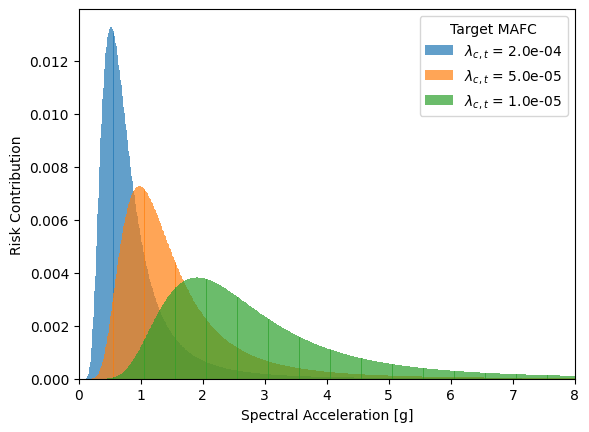

In [68]:
# Plot the risk contributions for each target MAFC
plt.figure()
ax = plt.gca()

for mafc_t in target_mafcs:
    theta_c = rsk.required_capacity_second_order(mafc_t, k0_2, k1_2, k2_2, beta)
    fragility = frag.lognormal_fragility_curve(im, theta_c, beta)
    
    mafc_a = rsk.mafe_second_order(theta_c, k0_2, k1_2, k2_2, beta)
    mafc_n = rsk.numerical_mafe(im, H_im_so, fragility)
    
    risk_contribution_values = rsk.risk_contribution(im, H_im_so, fragility, 
                                                     normalised=True)

    print(40*"=")
    print(f"Target MAFC: {mafc_t:.3e}")
    print(f"Required theta_c for target MAFC: {theta_c:.3f}")
    print(f"MAFC (analytical): {mafc_a:.3e}")
    print(f"MAFC (numerical): {mafc_n:.3e}")
    print(40*"=")

    ax.bar(im, risk_contribution_values, width=step*1.01, \
           label=f'$\lambda_{{c,t}}$ = {mafc_t:.1e}', align='edge', alpha=0.7)

ax.legend(title='Target MAFC', loc='upper right')
ax.set_xlabel('Spectral Acceleration [g]')
ax.set_ylabel('Risk Contribution')
ax.set_xlim(0, 8)


<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
C:\Users\clemettn\AppData\Local\Temp\ipykernel_21552\3431541807.py:11: SyntaxWarning: invalid escape sequence '\l'
  ln, = ax2.plot(im, fragility, label=f'$\lambda_{{c,t}}$ = {mafc_t:.1e}')


(0.0, 1.0)

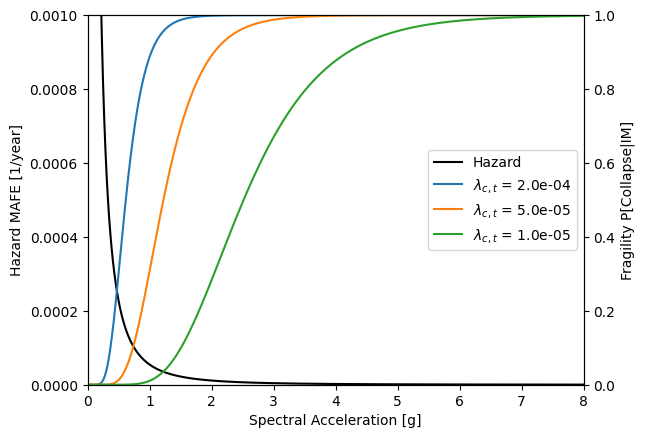

In [69]:
# plot hazard and fragility curves
fig, ax1 = plt.subplots() 
lns = []
ln, = ax1.plot(im, H_im_so, label='Hazard', color='k')
lns.append(ln)
ax2 = ax1.twinx()

for mafc_t in target_mafcs:
    theta_c = rsk.required_capacity_second_order(mafc_t, k0_2, k1_2, k2_2, beta)
    fragility = frag.lognormal_fragility_curve(im, theta_c, beta)
    ln, = ax2.plot(im, fragility, label=f'$\lambda_{{c,t}}$ = {mafc_t:.1e}')
    lns.append(ln)

labs = [l.get_label() for l in lns]

ax1.legend(lns, labs, loc="center right")
ax1.set_xlabel('Spectral Acceleration [g]')
ax1.set_ylabel('Hazard MAFE [1/year]')
ax2.set_ylabel('Fragility P[Collapse|IM]')
ax1.set_xlim(0, 8)

ax1.set_ylim(0, 1e-3)
ax2.set_ylim(0, 1)

<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
C:\Users\clemettn\AppData\Local\Temp\ipykernel_21552\1611607014.py:39: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Risk Contribution for $\lambda_{{c,t}}$ = {mafc_t:.1e}")


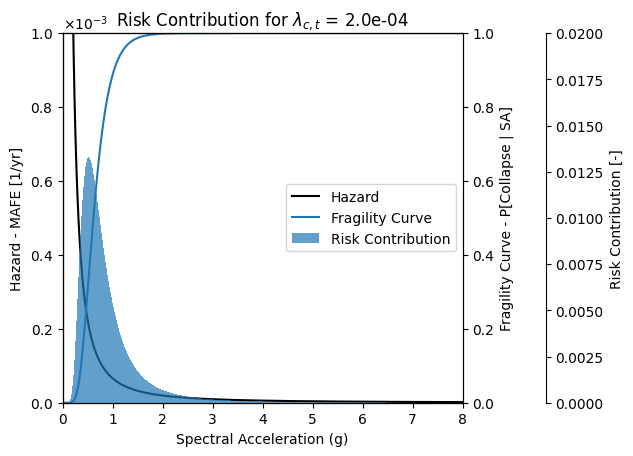

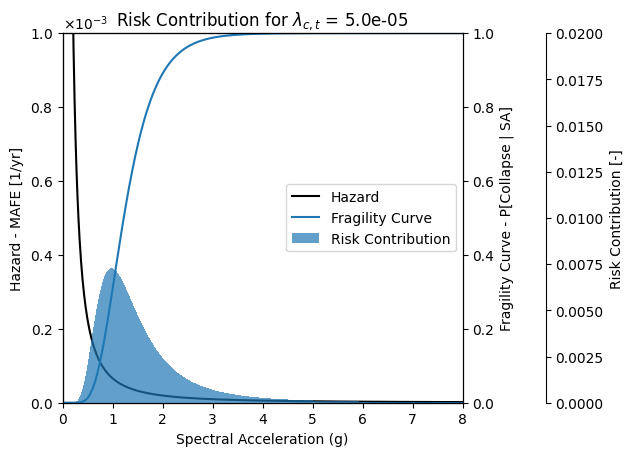

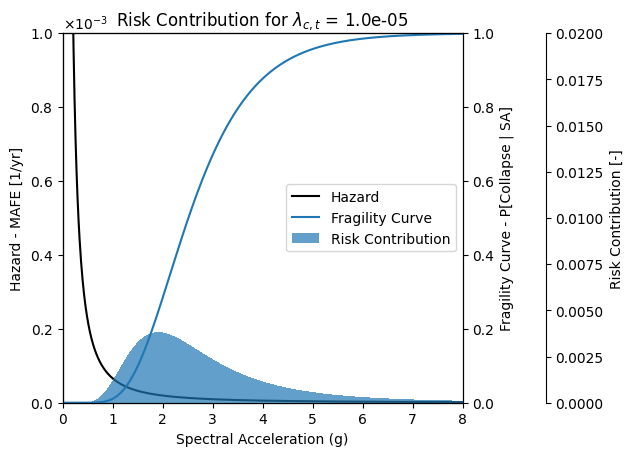

In [70]:
# plot hazard curves and fragility curves together with risk contributions

for mafc_t in target_mafcs:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax3 = ax1.twinx() 
    
    theta_c = rsk.required_capacity_second_order(mafc_t, k0_2, k1_2, k2_2, beta)
    fragility = frag.lognormal_fragility_curve(im, theta_c, beta)
    mafc_n = rsk.numerical_mafe(im, H_im_fo, fragility)
    risk_contribution_values = rsk.risk_contribution(im, H_im_so, fragility, 
                                                     normalised=True)

    ln1, = ax1.plot(im, H_im_fo, label='Hazard', color='k')
    ln2, = ax2.plot(im, fragility, label=f'Fragility Curve') 
    ln3 = ax3.bar(im, risk_contribution_values, width=step*1.01, 
                   label=f'Risk Contribution', alpha=0.7, align='edge')
    
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))  # always use scientific notation
    ax1.yaxis.set_major_formatter(formatter)

    lines = [ln1, ln2, ln3]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='center right')
    ax1.set_xlabel('Spectral Acceleration (g)')
    ax1.set_ylabel('Hazard - MAFE [1/yr]')
    ax2.set_ylabel('Fragility Curve - P[Collapse | SA]')
    ax3.set_ylabel('Risk Contribution [-]')
    ax3.spines["right"].set_position(("outward", 60))
    ax3.spines["right"].set_visible(True)
    ax1.set_xlim(0, 8)
    ax1.set_ylim(0, 1e-3)
    ax2.set_ylim(0, 1)
    ax3.set_ylim(0, 0.02)
    fig.subplots_adjust(right=0.75)

    plt.title(f"Risk Contribution for $\lambda_{{c,t}}$ = {mafc_t:.1e}")

## Risk Contribution --> First Order k=3

In [77]:
# hazard parameters first order -> Tailfingen for SA = 0.5s on rock
k0_3 = 5.909137E-06
k1_3 = 3.0

# first order hazard curve
H_im_fo3 = haz.first_order_approx(im, k0_3, k1_3)

<>:24: SyntaxWarning: invalid escape sequence '\l'
<>:24: SyntaxWarning: invalid escape sequence '\l'
C:\Users\clemettn\AppData\Local\Temp\ipykernel_21552\1434458312.py:24: SyntaxWarning: invalid escape sequence '\l'
  label=f'$\lambda_{{c,t}}$ = {mafc_t:.1e}', align='edge', alpha=0.7)


Target MAFC: 2.000e-04
Required theta_c for target MAFC: 0.393
MAFC (analytical): 2.000e-04
MAFC (numerical): 1.875e-04
1.000000000000003
Target MAFC: 5.000e-05
Required theta_c for target MAFC: 0.624
MAFC (analytical): 5.000e-05
MAFC (numerical): 4.798e-05
0.9999999999999958
Target MAFC: 1.000e-05
Required theta_c for target MAFC: 1.067
MAFC (analytical): 1.000e-05
MAFC (numerical): 9.760e-06
0.9999999999999999


(0.0, 8.0)

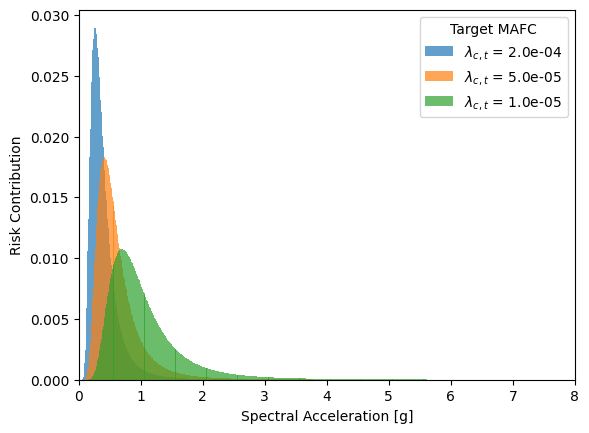

In [79]:
# Plot the risk contributions for each target MAFC
plt.figure()
ax = plt.gca()

for mafc_t in target_mafcs:
    theta_c = rsk.required_capacity_first_order(mafc_t, k0_3, k1_3, beta)
    fragility = frag.lognormal_fragility_curve(im, theta_c, beta)
    
    mafc_a = rsk.mafe_first_order(theta_c, k0_3, k1_3, beta)
    mafc_n = rsk.numerical_mafe(im, H_im_fo3, fragility)
    
    risk_contribution_values = rsk.risk_contribution(im, H_im_fo3, fragility, 
                                                     normalised=True)

    print(40*"=")
    print(f"Target MAFC: {mafc_t:.3e}")
    print(f"Required theta_c for target MAFC: {theta_c:.3f}")
    print(f"MAFC (analytical): {mafc_a:.3e}")
    print(f"MAFC (numerical): {mafc_n:.3e}")
    print(sum(risk_contribution_values))
    print(40*"=")

    ax.bar(im, risk_contribution_values, width=step*1.01, \
           label=f'$\lambda_{{c,t}}$ = {mafc_t:.1e}', align='edge', alpha=0.7)

ax.legend(title='Target MAFC', loc='upper right')
ax.set_xlabel('Spectral Acceleration [g]')
ax.set_ylabel('Risk Contribution')
ax.set_xlim(0, 8)


<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
C:\Users\clemettn\AppData\Local\Temp\ipykernel_21552\281348952.py:11: SyntaxWarning: invalid escape sequence '\l'
  ln, = ax2.plot(im, fragility, label=f'$\lambda_{{c,t}}$ = {mafc_t:.1e}')


(0.0, 1.0)

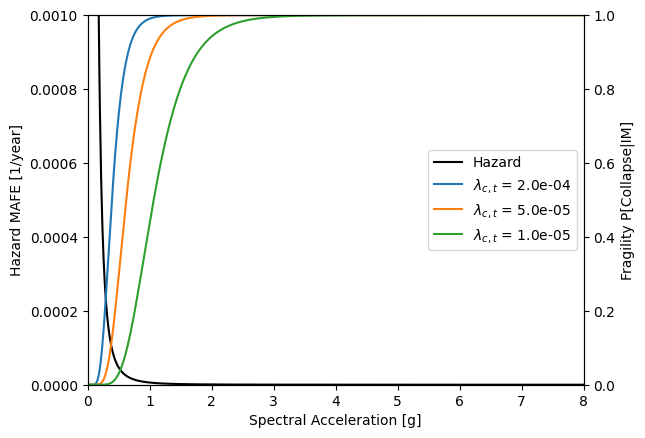

In [80]:
# plot hazard and fragility curves
fig, ax1 = plt.subplots() 
lns = []
ln, = ax1.plot(im, H_im_fo3, label='Hazard', color='k')
lns.append(ln)
ax2 = ax1.twinx()

for mafc_t in target_mafcs:
    theta_c = rsk.required_capacity_first_order(mafc_t, k0_3, k1_3, beta)
    fragility = frag.lognormal_fragility_curve(im, theta_c, beta)
    ln, = ax2.plot(im, fragility, label=f'$\lambda_{{c,t}}$ = {mafc_t:.1e}')
    lns.append(ln)

labs = [l.get_label() for l in lns]

ax1.legend(lns, labs, loc="center right")
ax1.set_xlabel('Spectral Acceleration [g]')
ax1.set_ylabel('Hazard MAFE [1/year]')
ax2.set_ylabel('Fragility P[Collapse|IM]')
ax1.set_xlim(0, 8)

ax1.set_ylim(0, 1e-3)
ax2.set_ylim(0, 1)

<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
C:\Users\clemettn\AppData\Local\Temp\ipykernel_21552\149785441.py:39: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Risk Contribution for $\lambda_{{c,t}}$ = {mafc_t:.1e}")


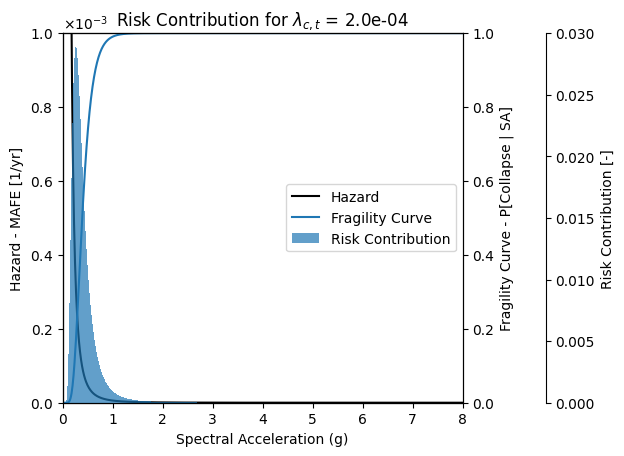

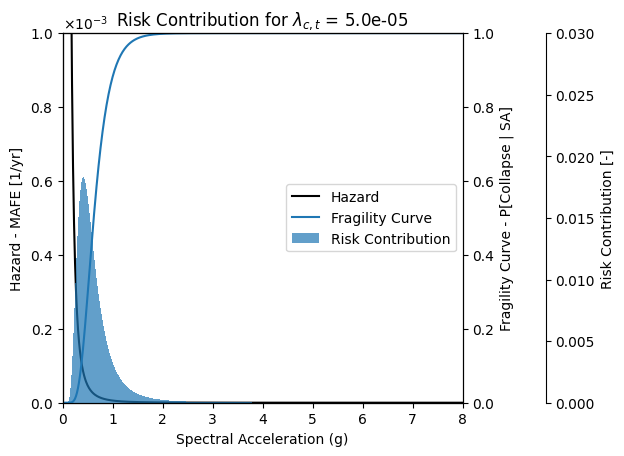

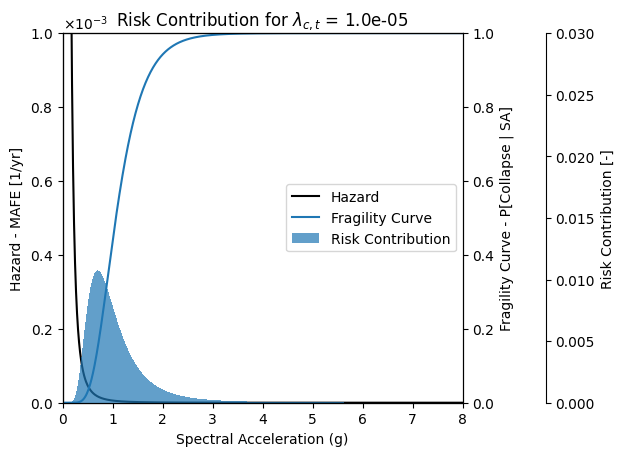

In [82]:
# plot hazard curves and fragility curves together with risk contributions

for mafc_t in target_mafcs:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax3 = ax1.twinx() 
    
    theta_c = rsk.required_capacity_first_order(mafc_t, k0_3, k1_3, beta)
    fragility = frag.lognormal_fragility_curve(im, theta_c, beta)
    mafc_n = rsk.numerical_mafe(im, H_im_fo3, fragility)
    risk_contribution_values = rsk.risk_contribution(im, H_im_fo3, fragility, 
                                                     normalised=True)

    ln1, = ax1.plot(im, H_im_fo3, label='Hazard', color='k')
    ln2, = ax2.plot(im, fragility, label=f'Fragility Curve') 
    ln3 = ax3.bar(im, risk_contribution_values, width=step*1.01, 
                   label=f'Risk Contribution', alpha=0.7, align='edge')
    
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))  # always use scientific notation
    ax1.yaxis.set_major_formatter(formatter)

    lines = [ln1, ln2, ln3]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='center right')
    ax1.set_xlabel('Spectral Acceleration (g)')
    ax1.set_ylabel('Hazard - MAFE [1/yr]')
    ax2.set_ylabel('Fragility Curve - P[Collapse | SA]')
    ax3.set_ylabel('Risk Contribution [-]')
    ax3.spines["right"].set_position(("outward", 60))
    ax3.spines["right"].set_visible(True)
    ax1.set_xlim(0, 8)
    ax1.set_ylim(0, 1e-3)
    ax2.set_ylim(0, 1)
    ax3.set_ylim(0, 0.03)
    fig.subplots_adjust(right=0.75)

    plt.title(f"Risk Contribution for $\lambda_{{c,t}}$ = {mafc_t:.1e}")